In [ ]:
# This is the Github Link https://github.com/FaresQaddoumi/ML-fundamentals-2025

In [50]:
!pip install xlrd

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\er\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [51]:
import pandas as pd
df = pd.read_excel(r"C:\Users\er\OneDrive\Desktop\titanic3.xls")
print(df.head())


   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

# Task 1: Displaying and Visualizing data


In [52]:
#Task 1
df.info()
df.describe()
df.isnull

#This is to check the data types such as missing values and basic information about the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


<bound method DataFrame.isnull of       pclass  survived                                             name  \
0          1         1                    Allen, Miss. Elisabeth Walton   
1          1         1                   Allison, Master. Hudson Trevor   
2          1         0                     Allison, Miss. Helen Loraine   
3          1         0             Allison, Mr. Hudson Joshua Creighton   
4          1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1304       3         0                             Zabour, Miss. Hileni   
1305       3         0                            Zabour, Miss. Thamine   
1306       3         0                        Zakarian, Mr. Mapriededer   
1307       3         0                              Zakarian, Mr. Ortin   
1308       3         0                               Zimmerman, Mr. Leo   

         sex      age  sibsp  parch  ticket      fare    cabin em

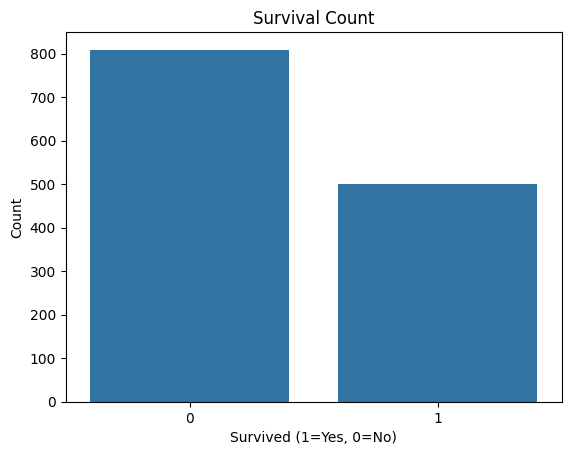

In [53]:
#Task 1 visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='survived', data=df)
plt.title("Survival Count")
plt.xlabel("Survived (1=Yes, 0=No)")
plt.ylabel("Count")
plt.show()

#This is a countplot graph to show the survival count of the people that were in the titanic, showing 1 as the people who survived and 0 as didnt.




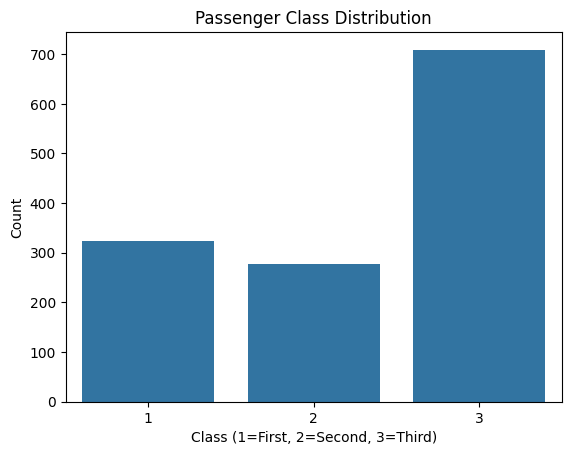

In [54]:
sns.countplot(x='pclass', data=df)
plt.title("Passenger Class Distribution")
plt.xlabel("Class (1=First, 2=Second, 3=Third)")
plt.ylabel("Count")
plt.show()

#this is to plot the distribution for the first, second, and third class passengers.


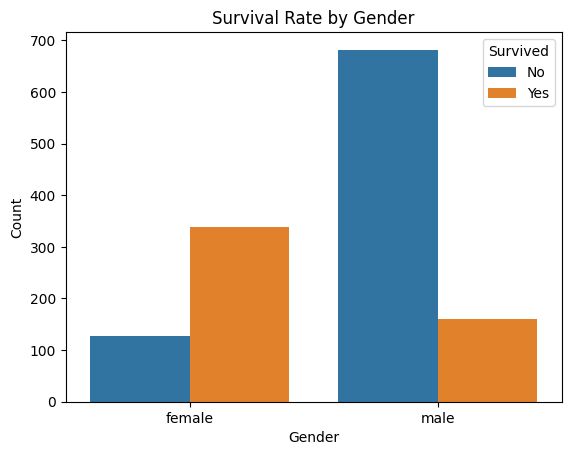

In [55]:
sns.countplot(x='sex', hue='survived', data=df)
plt.title("Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()
#This exlains the survival rate based on gender, and it splits the elements to convey them properly using plt.legend.

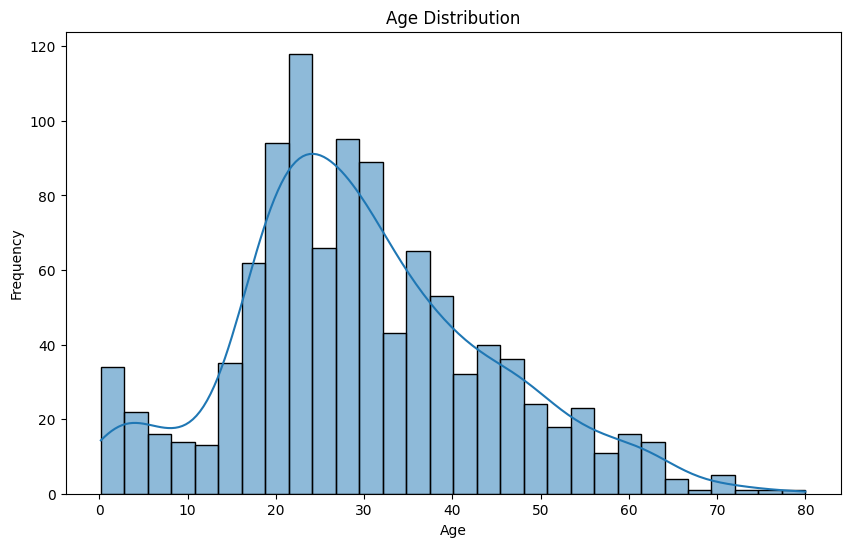

In [56]:
plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()
#This is to describe the age distribution of passengers using a histogram of various intervals.


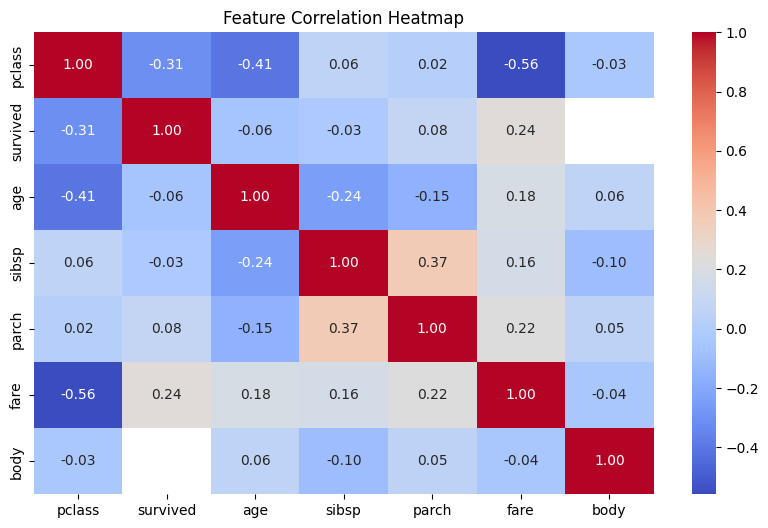

In [57]:
#This ensures that no numerical value errors arise because of string and float conflicts.
numeric_df = df.select_dtypes(include=['number'])

#This defines the correlation features that are going to be shown
corr_matrix = numeric_df.corr()

# These functions are to import the necessities needed to create the correlation matrix (make the functions executed)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

#these functions are responsible for plotting the heatmap, and showing every feature associated with the titanic statistics.





In [58]:
#Task 2: MANAGING MISSING VALUES
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


In [59]:
#age and fare strategy:
df.fillna({'age': df['age'].median(), 'fare': df['fare'].median()}, inplace=True)
#embarked mode strategy:
df.fillna({'embarked': df['embarked'].mode()[0]}, inplace=True)
#Cabin, Body, Boat, and Home.dest strategy:
df.drop(columns=['cabin', 'body', 'boat', 'home.dest'], inplace=True)
#Verification of missing values
print("\nMissing values after handling:")
print(df.isnull().sum())










Missing values after handling:
pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64


## Task 2: *Managing missing Values:*
## 1: Checking for missing values in each column
- We basically define the missing values to check if there actually are missing values in each column.
## 2: What strategies to use to find missing values for each type of columns:
Numerical columns:
- For numerical values such as age and fare, we have to use things such as the mean (if its normally distributed) and median (if its skewed) to find the missing values.
- It is important to use the mean and median with numerical columns since things like age and fare are important to predict the survival (we will use median since it is more efficient in detecting outliers.We will also use df.fillna() because it will simply handle the age and fare missing values.
-  *We will also use df.fillna() because it will simply handle the age and fare missing values*.
 
Embarked:
- We will use the mode to see the most frequent value since that is what is needed to fill in the missing values in embarked (embarked has only 2 missing values).

For columns with too many missing values, we just drop.

Cabin, body, and boat:
- The best strategy here is to drop the columns since they all have too many missing values ( for Cabin tho we can use mode since it has missing values but not too much, but to make it easier we will just drop).

Homedest:
- We will also drop homedest since it doesn't directly impact survival, and machine learing models handle numerical feauters better.

### Verification:
- Last thing we do is to verify there are no missing values left with printing to see if there actually are missing values left





In [60]:
#Task 3: Encoding Categorical Variables:
# Identify/list what the categorical variables are:
categorical_var = df.select_dtypes(include=['object']).columns
print("\nCategorical Variables:")
print(categorical_var)



Categorical Variables:
Index(['name', 'sex', 'ticket', 'embarked'], dtype='object')


In [61]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Identifying the categorical variables
categorical_var = ['name', 'sex', 'ticket', 'embarked']

# Convert categorical columns to string to avoid mixed types
df[categorical_var] = df[categorical_var].astype(str)

# Defining/Initializing OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Transforming the categorical columns and applying encoding to them
encoded_data = encoder.fit_transform(df[categorical_var])

# Converting the encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_var))

# Dropping the original categorical variables from the DataFrame
df.drop(columns=categorical_var, inplace=True)

# Now we concatenate the encoded DataFrame to the original DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Verify and show the rows after encoding
print("\nDataFrame after One-Hot Encoding:")
print(df.head())







DataFrame after One-Hot Encoding:
   pclass  survived      age  sibsp  parch      fare  \
0       1         1  29.0000      0      0  211.3375   
1       1         1   0.9167      1      2  151.5500   
2       1         0   2.0000      1      2  151.5500   
3       1         0  30.0000      1      2  151.5500   
4       1         0  25.0000      1      2  151.5500   

   name_Abbott, Master. Eugene Joseph  name_Abbott, Mr. Rossmore Edward  \
0                                 0.0                               0.0   
1                                 0.0                               0.0   
2                                 0.0                               0.0   
3                                 0.0                               0.0   
4                                 0.0                               0.0   

   name_Abbott, Mrs. Stanton (Rosa Hunt)  name_Abelseth, Miss. Karen Marie  \
0                                    0.0                               0.0   
1                    

## Task 3: *Encoding Categorical Variables*:
#### 1: What are the Categorical variables?
- Categorical variables are the columns that contain data that is not numerical, like names. To identify what the categorical variables are in the dataset we have to define what the categorical columns are (objecct columns), and then we just have to print the result of the findings in order to see what those columns are as well as how to convert them from text into numbers.
#### 2: OneHotEncoder:
- We will use OneHotEncoder to convert the categorical text based variables into numerical binary columns (0 and 1).
#### 3: Code Explanation:
- We start off by importing the necessary libraries, then we identify the categorical variables that we need to convert and display later.
- We then convert the categorical columns to string to avoid syntax errors such as mixed types (before applying it syntax errors occured).
- The use of OneHotEncoder along with drop='first' which will drop the first category to avoid multicollinearity, which can negatively impact model performance. Then we use the sparse=False to ensure that it is a regular NumPy array instead of a sparse matrix.
- The encoded_data = "encoder.fit_transform(df[categorical_var])" transforms the categorical variables into binary ones.
- Then we use df.drop to drop the original categorical columns from the dataframe, and pd.concat to concatenate the encoded to the original dataframe
- Lastly, we use df.head() to verify and show the changes in the variables/columns.
#### 4: Observation and Impact on Machine Learning Models:
- After using OneHotEncoding, we can observe the embarked, ticket, and survival rate transformations, specifying if its true (1) or false (0). Or that If the person embarked from Queenstown or southampton.
  ##### How it impacts ML models:
  - Since machine learning models like logistic regression require numerical input, OneHotEncoder solves that problem by converting the categoriccal columns into numerical binary ones.Its also important so that models dont assume ordinal relationships between these categorical variables. Lastly, OneHotEncoder splits/increases the dataset into more columns which increases computational complexity.
  - By dropping the first category we avoid multicollieanrity which negatively impacts model performance, and by encoding the categorical variables we can allow the model to improve the accuracy of its predections by seeing the patterns of different categories.

In [35]:
print(df['fare'].describe())

count    1309.000000
mean       33.281086
std        51.741500
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64


In [36]:
#Task 4: Feature Scaling:
#StandardScaler importation:
from sklearn.preprocessing import StandardScaler

# initialize/define the numerical columns of age and fare
numerical_cols = ['age', 'fare']

# Initialize/defining StandardScaler
scaler = StandardScaler()

# Here we organize (fit) and we transform the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

#verifying the numerical columns
print(df[numerical_cols].head())


        age      fare
0 -0.039005  3.442584
1 -2.215952  2.286639
2 -2.131977  2.286639
3  0.038512  2.286639
4 -0.349075  2.286639


In [37]:
from sklearn.preprocessing import MinMaxScaler

# Defining MinMaxScaler
minmax_scaler = MinMaxScaler()

# Here we organize (fit) and we transform the numerical columns
df[numerical_cols] = minmax_scaler.fit_transform(df[numerical_cols])
#verifying the numerical columns
print(df[numerical_cols].head())

        age      fare
0  0.361169  0.412503
1  0.009395  0.295806
2  0.022964  0.295806
3  0.373695  0.295806
4  0.311064  0.295806


In [38]:
#Verifying if the values are correct.
print("Min (MinMaxScaler):", df[['age', 'fare']].min())
print("Max (MinMaxScaler):", df[['age', 'fare']].max())

Min (MinMaxScaler): age     0.0
fare    0.0
dtype: float64
Max (MinMaxScaler): age     1.0
fare    1.0
dtype: float64


## Task 4: Feature Scaling:
#### 1: Standarizing Numerical Values Using StandardScaler:
- For algorithms that assume normally distributed data like linear and logistic regression, we have to use standarization since it transforms the data to have a mean of 0 and standard deviation of 1. Since we already know that age and fare are going to be the numerical values that need standarizing we just have to select them from the columns.
- By analyzing the StandardScaler results, we can see that the age numbers are fairly standarized, but the fare numbers are a bit too high,
- After using the 'describe()' function to indicate the presence of outliers in the fare column, we can see that the max is too high, indicating presence of outliers, There are a few ways to handle the outliers but the dataset size would be at risk, so we will leave it at that.
#### 2: Normalizing Numerical Values Using MinMaxScaler:
- For algorithms like neural networks that are sensitive to the size of inputs, we have to use normalization since it scales the data into a fixed range from 0 to 1.
- Based on the outputs for the MinMaxScaler we can see that the age values are spread without extreme outliers, while as we observe the fare values we can see a skewed distribution with a few outliers.
- We can check if the values are correct by seeing if the min and max values are correct, the min should be 0 and the max should be 1. Which is verified in the cell after the MinMaxScaler.
#### 3: Differences between Standarization and Normalization:
- Starting off with the size and scaling, we can see standarization having a range of mean 0 and standard deviation of 1. While normalization typically has a range of 0-1. Standarization is better at preserving distribution, while normalization is better for putting values in a specific range. For handling outliers, normalization is more sensetive to outliers than standarization.
- Importance of scaling: Model performance increases whenever there is an importance for similar scaling.
-  Whenever there is feature scaling, linear and logistic regression converge faster
-  Magnitude wise, it is important to note that it helps prevent features with larger magnitude to dominate the features with smaller magnitude.

In [39]:
#Task 5:
from sklearn.model_selection import train_test_split

# Step 1: Split into training and others
train_df, others_df = train_test_split(df, test_size=0.3, random_state=42, stratify=df['survived'])

# Step 2: Split others into validation (15%) and test (15%)
val_df, test_df = train_test_split(others_df, test_size=0.5, random_state=42, stratify=others_df['survived'])

# Print the sizes of each set
print("Training set size:", len(train_df))
print("Validation set size:", len(val_df))
print("Test set size:", len(test_df))


Training set size: 916
Validation set size: 196
Test set size: 197


## Task 5: Data Splitting
- We will split the data using stratification since it ensures that the variables distribution of proportions of survivors vs non survivors is the same in all the splits, to avoide inbalance.
- we split the dataset into 70% training then others. After that its validation set as well as the test set, which accounts to 30%. The random state of number 42 ensures the splits are reproducible.

In [40]:
#Task 6:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\er\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [41]:
#Task 6: Addressing Class Imbalance
import pandas as pd
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter
from sklearn.linear_model import LogisticRegression

# Separate features (X) and target (y)
X = df.drop('survived', axis=1)  # Features (all columns except 'Survived')
y = df['survived']  # Target column

# Apply SMOTE
X_resampled_smote, y_resampled_smote = SMOTE(random_state=42).fit_resample(X, y)
print("Class distribution after SMOTE:", sorted(Counter(y_resampled_smote).items()))

# Train Logistic Regression on SMOTE-resampled data
clf_smote = LogisticRegression(random_state=42).fit(X_resampled_smote, y_resampled_smote)

# Apply ADASYN
X_resampled_adasyn, y_resampled_adasyn = ADASYN(random_state=42).fit_resample(X, y)
print("Class distribution after ADASYN:", sorted(Counter(y_resampled_adasyn).items()))

# Train Logistic Regression on ADASYN-resampled data
clf_adasyn = LogisticRegression(random_state=42).fit(X_resampled_adasyn, y_resampled_adasyn)

Class distribution after SMOTE: [(0, 809), (1, 809)]
Class distribution after ADASYN: [(0, 809), (1, 781)]


## Task 6: *Addressing Class Imbalance*
- We address the class imbalance because in this dataset, there is a big imbalance since more people didnt survive than survive, so the model usually tends to favor the majority class leading to biased analysis and performance, so SMOTE addresses this imbalance and prevents it by balancing the classes (creating synthetic samples).

In [42]:
#Task 7:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

# Separate features (X) and target (y)
X = df.drop('survived', axis=1)  # Features (all columns except 'Survived')
y = df['survived']  # Target column

# Split the dataset into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize VarianceThreshold
selector = VarianceThreshold(threshold=0.01)  # Adjust threshold as needed

# Fit and transform the training data
X_train_low_variance = selector.fit_transform(X_train)

# Get the selected features
selected_features = X_train.columns[selector.get_support()]
print("Selected features after removing low-variance features:", selected_features)

Selected features after removing low-variance features: Index(['pclass', 'age', 'sibsp', 'parch', 'sex_male', 'embarked_Q',
       'embarked_S'],
      dtype='object')


In [46]:
#Task 7:

import pandas as pd
import numpy as np

# Calculate the correlation matrix
corr_matrix = X_train[selected_features].corr().abs()

# Create a mask to identify highly correlated features
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features to drop
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]  # Adjust threshold as needed
print("Features to drop due to high correlation:", to_drop)

# Drop highly correlated features
X_train_final = X_train[selected_features].drop(to_drop, axis=1)
print("Final features after removing highly correlated features:", X_train_final.columns)

Features to drop due to high correlation: []
Final features after removing highly correlated features: Index(['pclass', 'age', 'sibsp', 'parch', 'sex_male', 'embarked_Q',
       'embarked_S'],
      dtype='object')


## Task 7: Feature Selection
-The purpose of this task is to remove low variance features since they provide no information for the model. We also remove highly correlated features to avoid multicollienarity.
#### Why do we perform Task 6 and 7 after Splitting?
- Performing them on the entire dataset can cause data leakage and we also should leave the test set untouched for avoiding unbiased opinion from the model.
- Importance of tasks after splitting: Adressing the class imbalance should be done in the training set (splitting section) to actually visualize the real world scenario. We also help prevent data leakage because using the training set will not negatively influence the feature selection process.

In [49]:
#Task 8:

# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Use SMOTE data
try:
    model.fit(X_train_smote, y_train_smote)  # If SMOTE data exists
    train_data = "X_train_smote"
except NameError:
    model.fit(X_train, y_train)  # Use original training data
    train_data = "X_train"

# Make predictions
y_val_pred = model.predict(X_val)


predictions_df = pd.DataFrame({'Actual': y_val.values, 'Predicted': y_val_pred})
print("\nSample Predictions:")
print(predictions_df.head(10))

#confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_val, y_val, cmap='Purples')
plt.title(f"Confusion Matrix for Logistic Regression (Trained on {train_data})")
plt.show()

#actual survival vs predicted survival
plt.figure(figsize=(8,4))
sns.countplot(x=y_val, label="Actual", color='green', alpha=0.6)
sns.countplot(x=y_val_pred, label="Predicted", color='yellow', alpha=0.6)
plt.title(f"Actual vs. Predicted Survival (Trained on {train_data})")
plt.legend(["Actual", "Predicted"])
plt.xlabel("Survival (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


NameError: name 'model' is not defined